<a href="https://colab.research.google.com/github/CollinsKarani/Passphrase-and-Password-Guessing-Using-Recurrent-Neural-Networks/blob/main/Passwords10_13_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Downloading...
From (original): https://drive.google.com/uc?id=1DRlqkc2OQ2M_IFLlaDOxa41VQ6ZgPlX0
From (redirected): https://drive.google.com/uc?id=1DRlqkc2OQ2M_IFLlaDOxa41VQ6ZgPlX0&confirm=t&uuid=423bf7cd-49cb-42a2-a58b-6a19b7112f8e
To: /content/version_1.txt
100%|██████████| 816M/816M [00:03<00:00, 225MB/s]


Processing batch 1...
Batch 1 processed.
Levenshtein distances for batch 1: 4258821
Jaro-Winkler distances for batch 1: 4258821


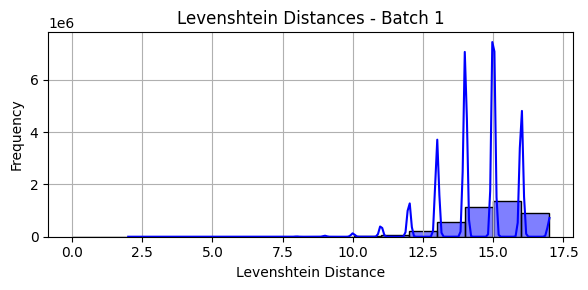

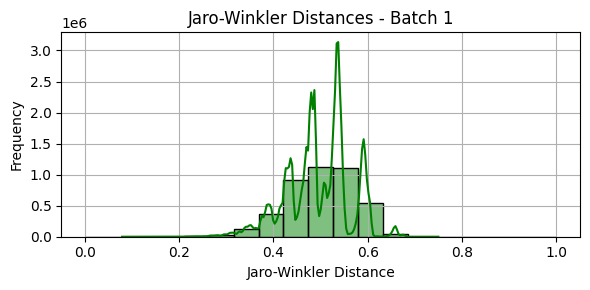

Processing batch 2...
Batch 2 processed.
Levenshtein distances for batch 2: 291466
Jaro-Winkler distances for batch 2: 291466


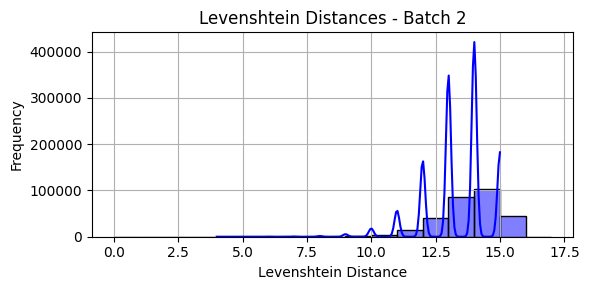

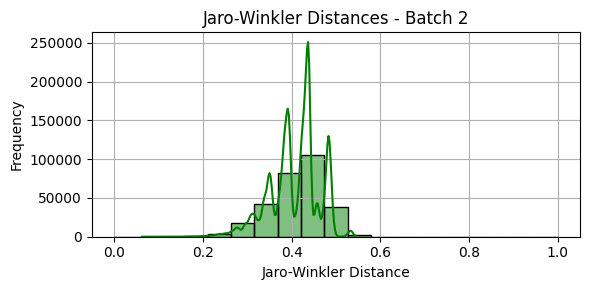

Processing batch 3...
Batch 3 processed.
Levenshtein distances for batch 3: 292230
Jaro-Winkler distances for batch 3: 292230


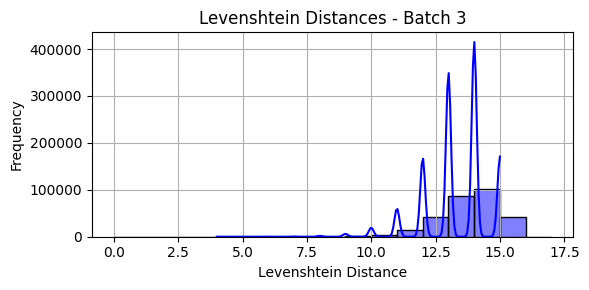

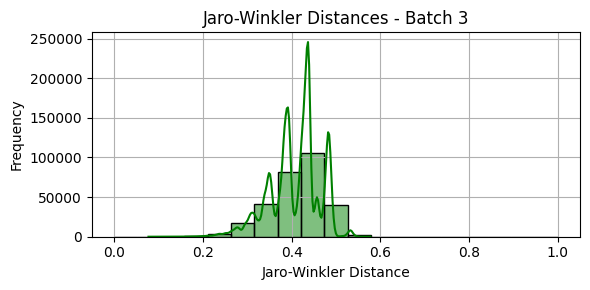

Processing batch 4...
Batch 4 processed.
Levenshtein distances for batch 4: 278631
Jaro-Winkler distances for batch 4: 278631


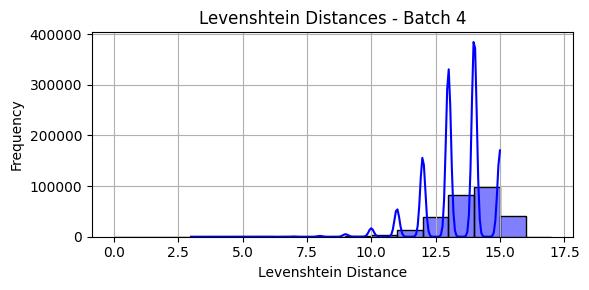

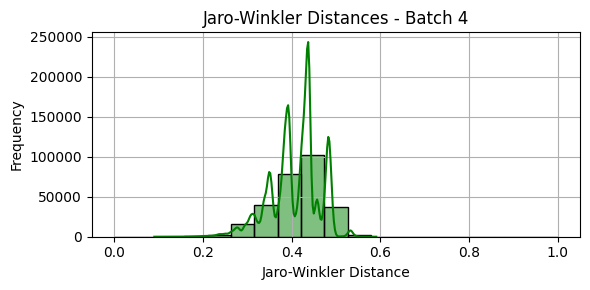

Processing batch 5...
Batch 5 processed.
Levenshtein distances for batch 5: 289180
Jaro-Winkler distances for batch 5: 289180


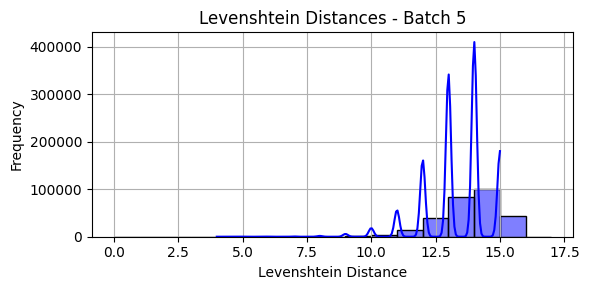

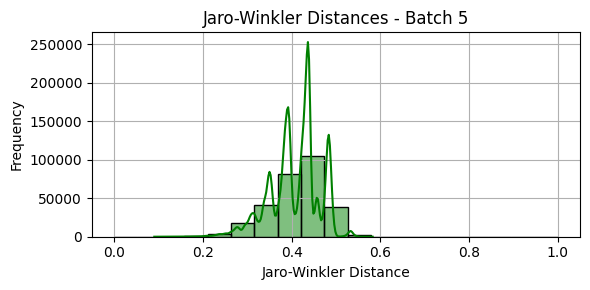

Processing batch 6...
Batch 6 processed.
Levenshtein distances for batch 6: 299151
Jaro-Winkler distances for batch 6: 299151


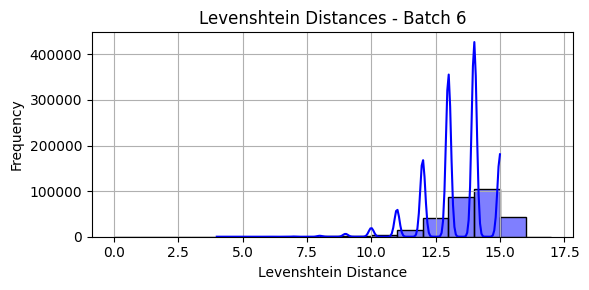

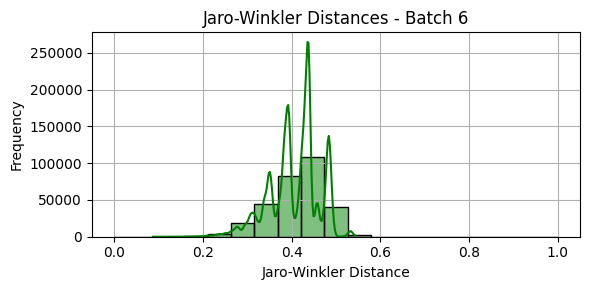

Processing batch 7...
Batch 7 processed.
Levenshtein distances for batch 7: 287661
Jaro-Winkler distances for batch 7: 287661


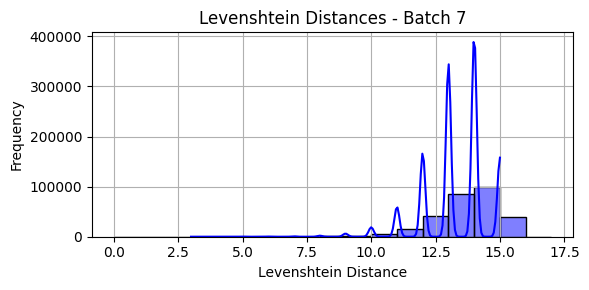

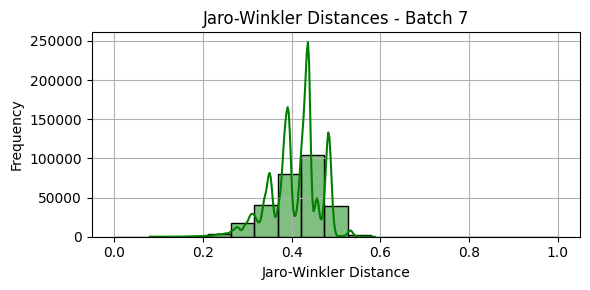

Processing batch 8...
Batch 8 processed.
Levenshtein distances for batch 8: 286146
Jaro-Winkler distances for batch 8: 286146


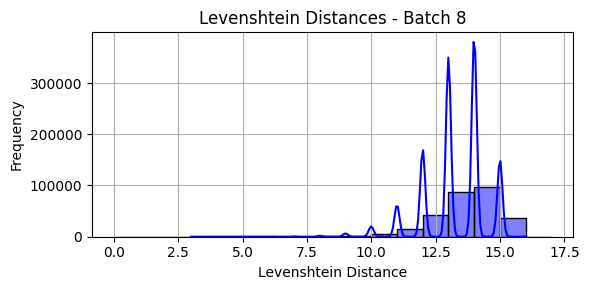

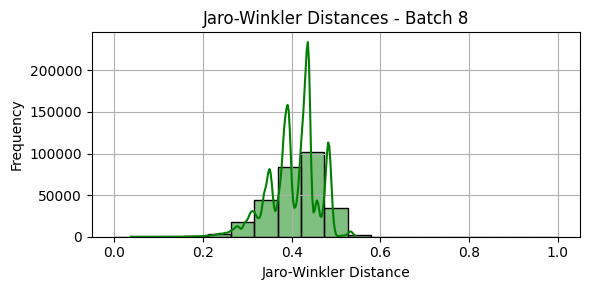

Processing batch 9...
Batch 9 processed.
Levenshtein distances for batch 9: 304590
Jaro-Winkler distances for batch 9: 304590


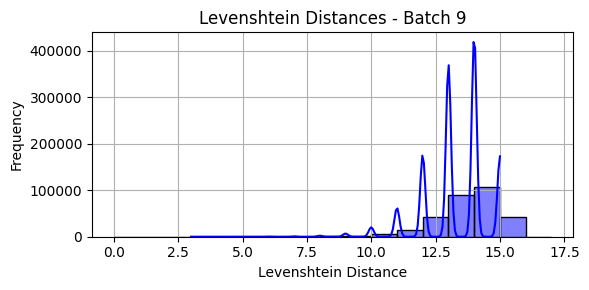

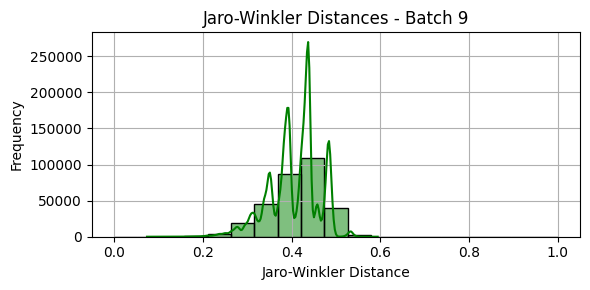

Processing batch 10...
Batch 10 processed.
Levenshtein distances for batch 10: 296835
Jaro-Winkler distances for batch 10: 296835


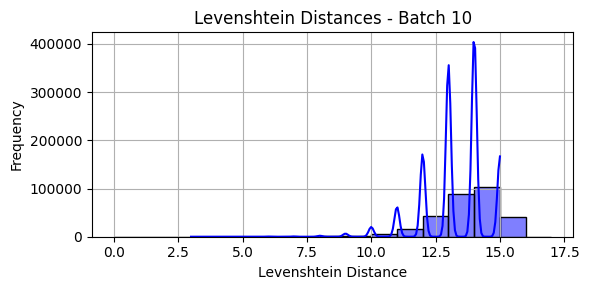

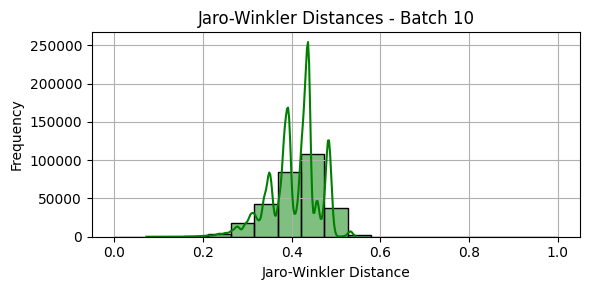

Processing batch 11...
Batch 11 processed.
Levenshtein distances for batch 11: 16836
Jaro-Winkler distances for batch 11: 16836


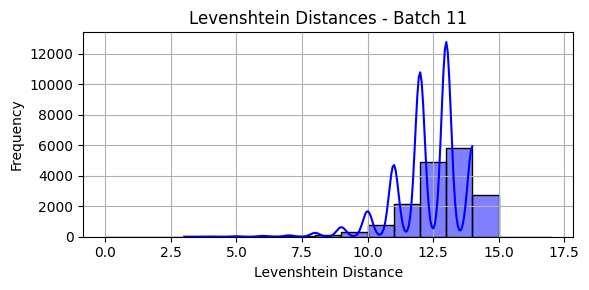

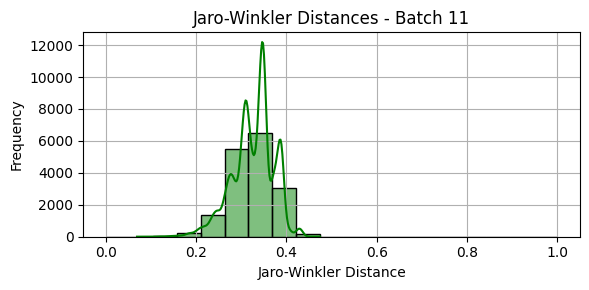

Processing batch 12...
Batch 12 processed.
Levenshtein distances for batch 12: 18528
Jaro-Winkler distances for batch 12: 18528


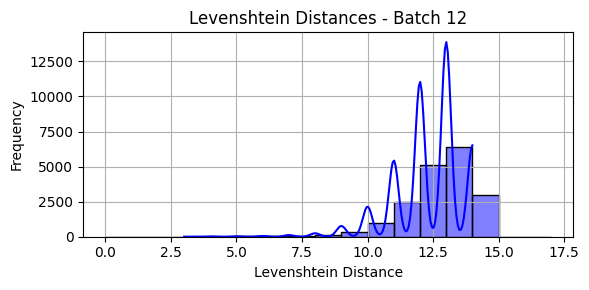

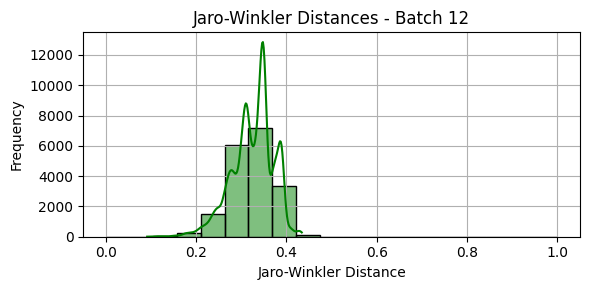

Processing batch 13...
Batch 13 processed.
Levenshtein distances for batch 13: 15400
Jaro-Winkler distances for batch 13: 15400


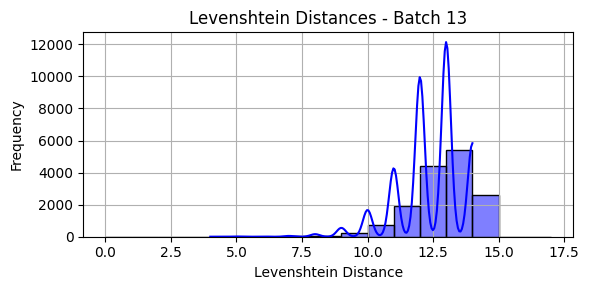

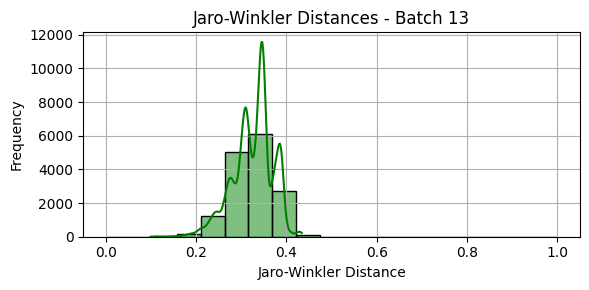

Processing batch 14...
Batch 14 processed.
Levenshtein distances for batch 14: 12880
Jaro-Winkler distances for batch 14: 12880


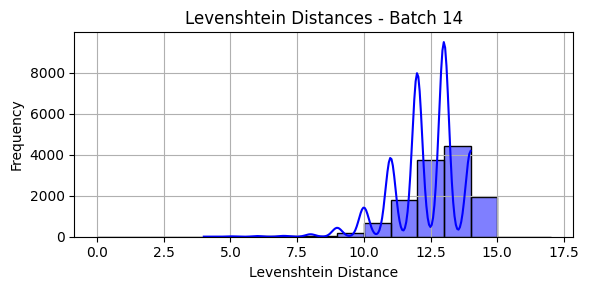

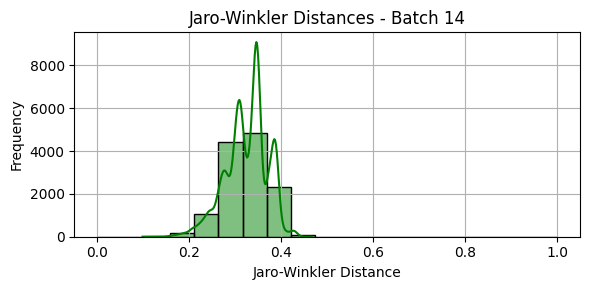

Processing batch 15...
Batch 15 processed.
Levenshtein distances for batch 15: 17955
Jaro-Winkler distances for batch 15: 17955


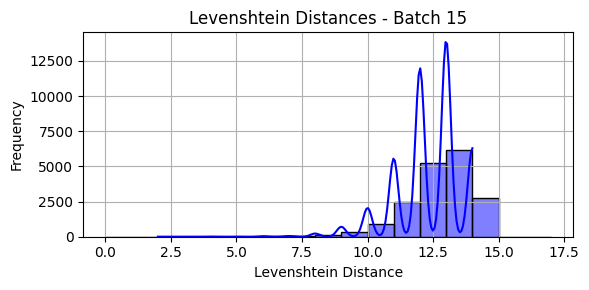

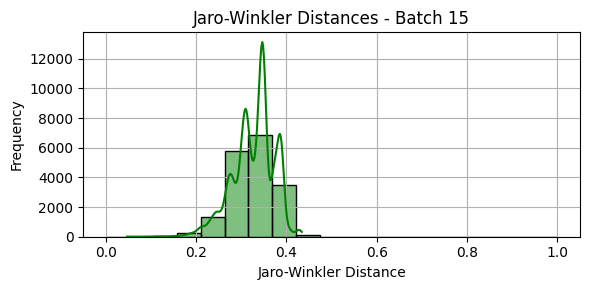

Processing batch 16...
Batch 16 processed.
Levenshtein distances for batch 16: 17578
Jaro-Winkler distances for batch 16: 17578


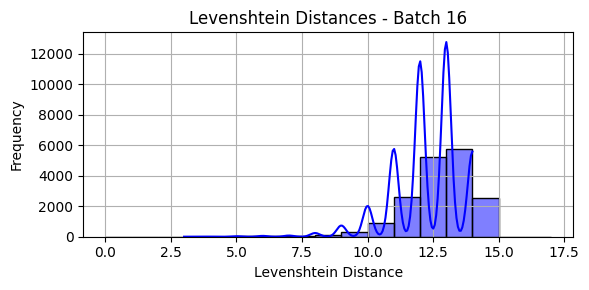

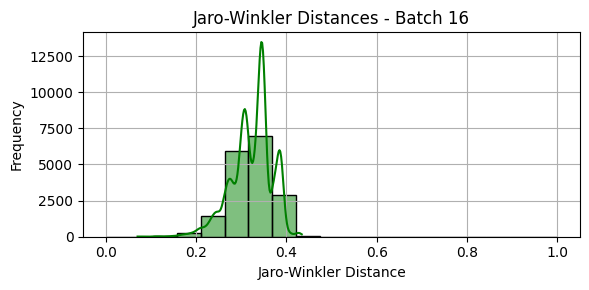

Processing batch 17...
Batch 17 processed.
Levenshtein distances for batch 17: 14878
Jaro-Winkler distances for batch 17: 14878


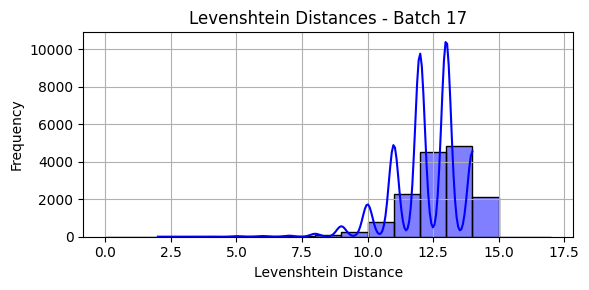

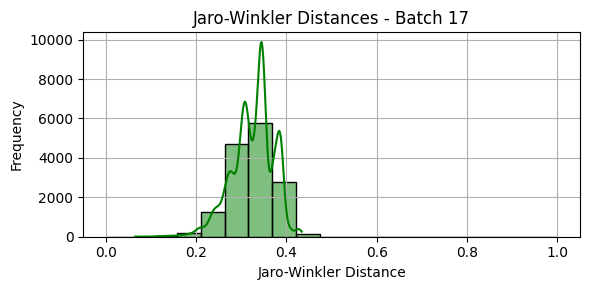

Processing batch 18...
Batch 18 processed.
Levenshtein distances for batch 18: 23871
Jaro-Winkler distances for batch 18: 23871


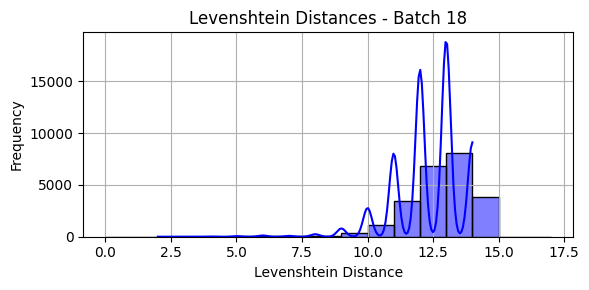

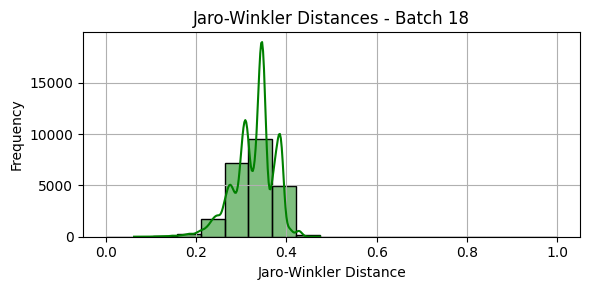

Processing batch 19...
Batch 19 processed.
Levenshtein distances for batch 19: 19701
Jaro-Winkler distances for batch 19: 19701


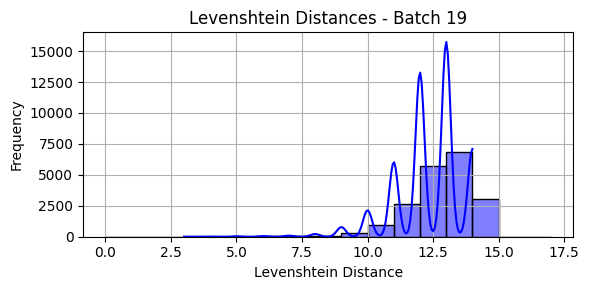

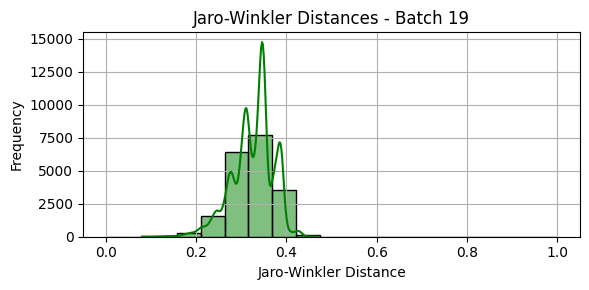

Processing batch 20...
Batch 20 processed.
Levenshtein distances for batch 20: 15753
Jaro-Winkler distances for batch 20: 15753


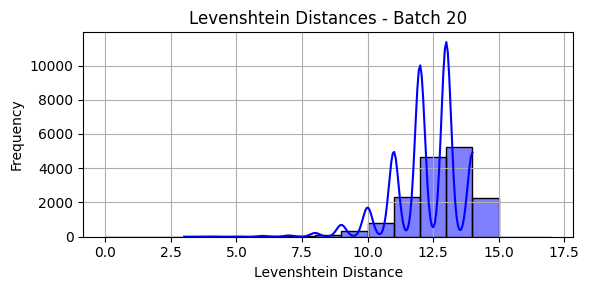

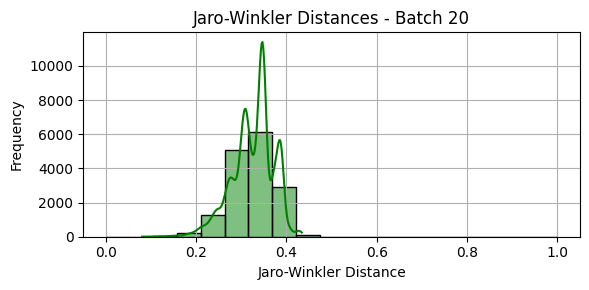

Processing batch 21...
Batch 21 processed.
Levenshtein distances for batch 21: 14196
Jaro-Winkler distances for batch 21: 14196


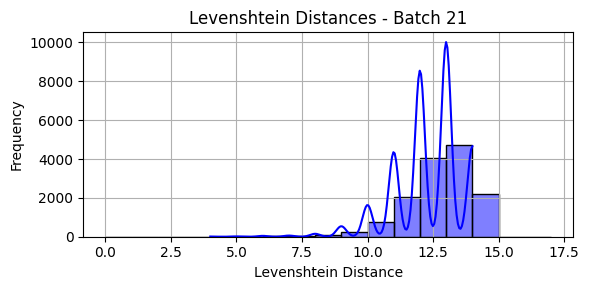

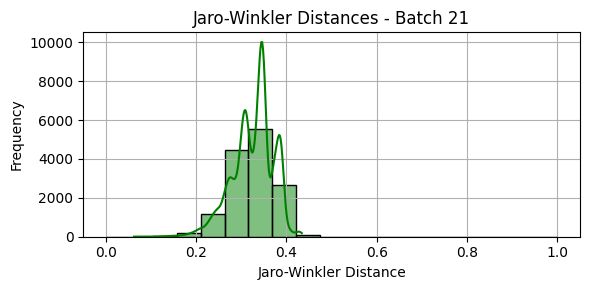

Processing batch 22...
Batch 22 processed.
Levenshtein distances for batch 22: 21115
Jaro-Winkler distances for batch 22: 21115


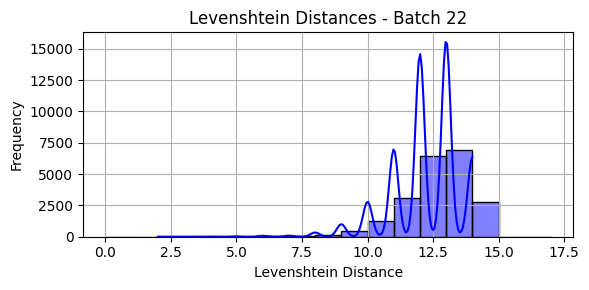

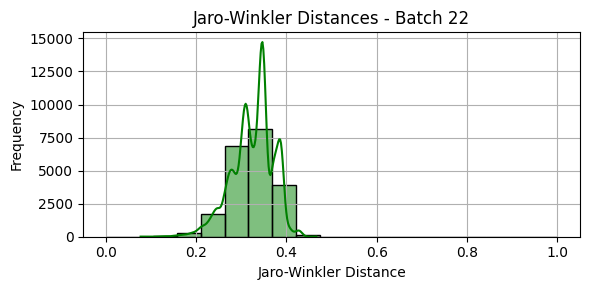

Processing batch 23...
Batch 23 processed.
Levenshtein distances for batch 23: 21321
Jaro-Winkler distances for batch 23: 21321


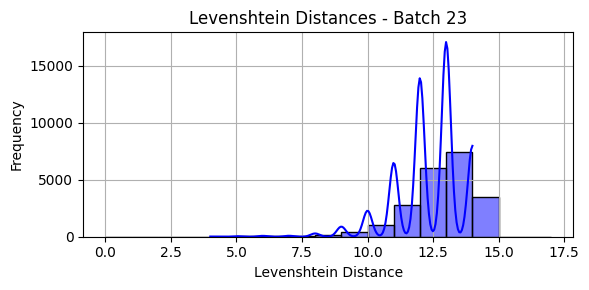

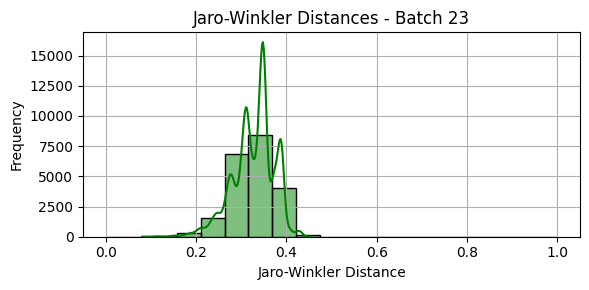

Processing batch 24...
Batch 24 processed.
Levenshtein distances for batch 24: 19701
Jaro-Winkler distances for batch 24: 19701


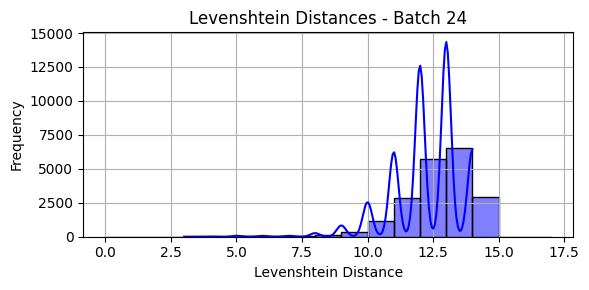

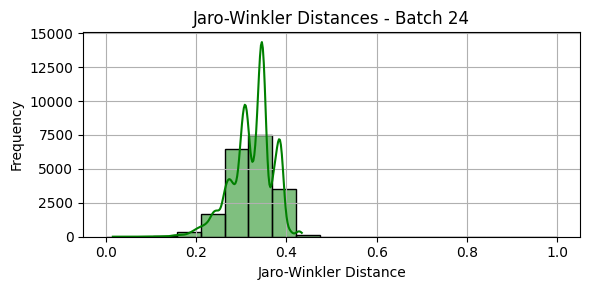

Processing batch 25...
Batch 25 processed.
Levenshtein distances for batch 25: 18336
Jaro-Winkler distances for batch 25: 18336


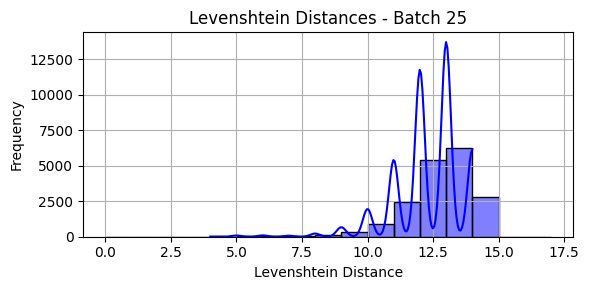

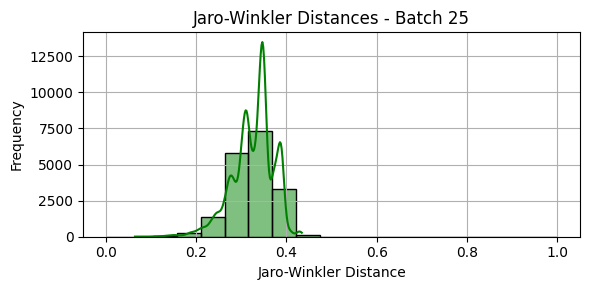

Processing batch 26...
Batch 26 processed.
Levenshtein distances for batch 26: 17020
Jaro-Winkler distances for batch 26: 17020


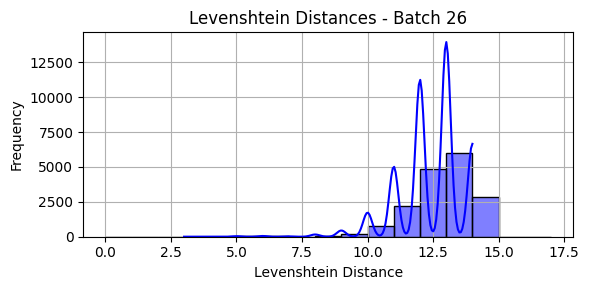

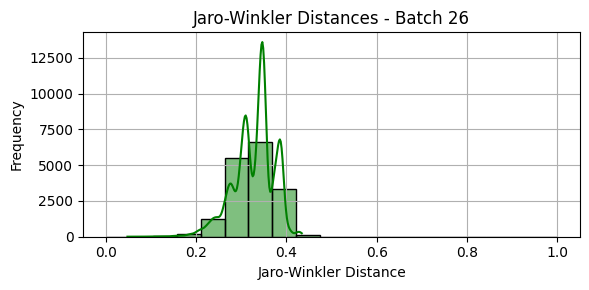

Processing batch 27...
Batch 27 processed.
Levenshtein distances for batch 27: 19110
Jaro-Winkler distances for batch 27: 19110


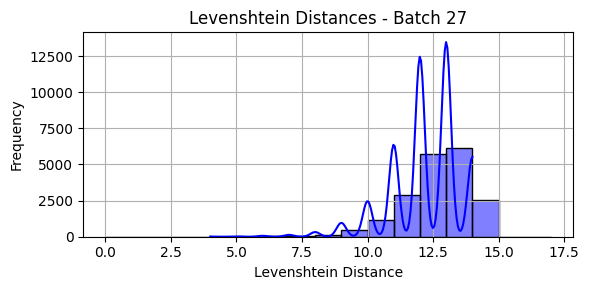

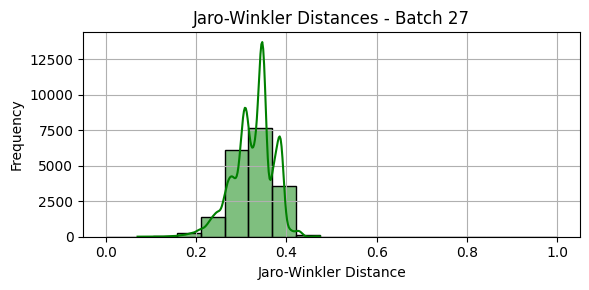

Processing batch 28...
Batch 28 processed.
Levenshtein distances for batch 28: 17391
Jaro-Winkler distances for batch 28: 17391


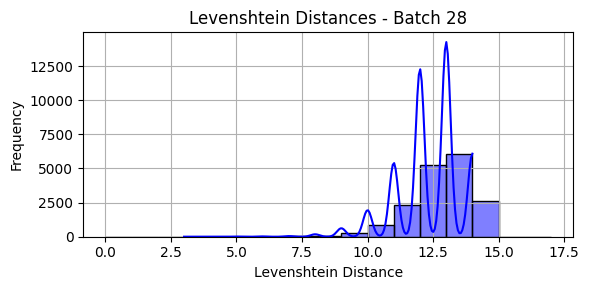

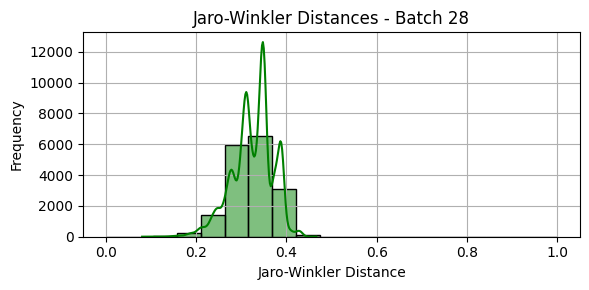

Processing batch 29...
Batch 29 processed.
Levenshtein distances for batch 29: 14535
Jaro-Winkler distances for batch 29: 14535


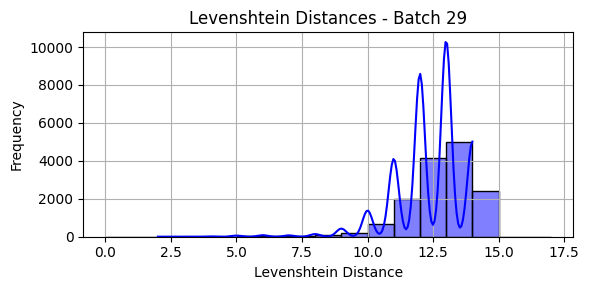

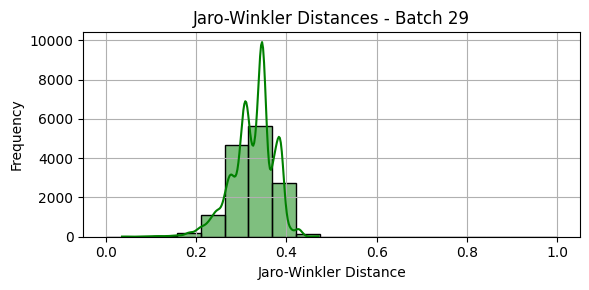

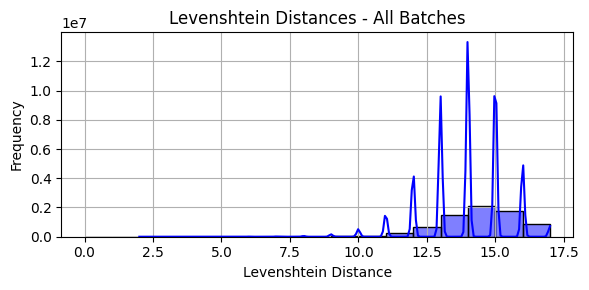

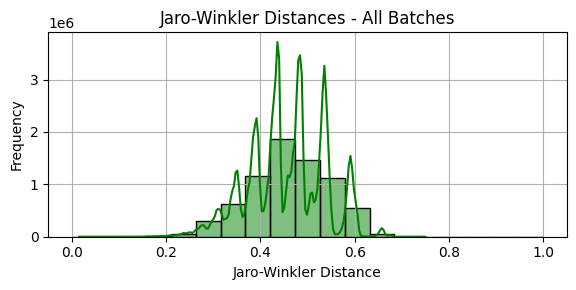

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.metrics.distance import edit_distance, jaro_winkler_similarity
import nltk
import gdown

nltk.download('punkt')

# Get password dataset from Google Drive
file_id = '1DRlqkc2OQ2M_IFLlaDOxa41VQ6ZgPlX0'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'version_1.txt', quiet=False)

# Filter passwords based on length and ASCII characters
def filter_passwords(password_list):
    filtered = [pwd for pwd in password_list if 5 <= len(pwd) <= 17 and pwd.isascii()]
    return list(set(filtered))  # Remove duplicates

# Load passwords in batches
def load_passwords(filename, batch_size=1000000):
    with open(filename, 'r', encoding='latin-1') as f:
        batch = []
        for line in f:
            batch.append(line.strip())
            if len(batch) == batch_size:
                yield filter_passwords(batch)
                batch = []
        if batch:
            yield filter_passwords(batch)

# Compute Levenshtein distances for a batch of passwords
def compute_levenshtein_distances(password_batch):
    num_passwords = len(password_batch)
    distances = []

    for i in range(num_passwords):
        for j in range(i + 1, num_passwords):  # Only upper triangle to save space
            dist = edit_distance(password_batch[i], password_batch[j])
            distances.append(dist)
    return distances

# Compute Jaro-Winkler similarities for a batch of passwords
def compute_jaro_winkler_distances(password_batch):
    num_passwords = len(password_batch)
    distances = []

    for i in range(num_passwords):
        for j in range(i + 1, num_passwords):  # Only upper triangle to save space
            similarity = jaro_winkler_similarity(password_batch[i], password_batch[j])
            dist = 1 - similarity  # Convert similarity to distance (0 = identical, 1 = completely different)
            distances.append(dist)
    return distances

# Load and process the dataset in chunks
password_file = 'version_1.txt'  # Path to the password dataset

# Initialize empty lists to store distances
all_levenshtein_distances = []
all_jaro_winkler_distances = []
batch_num = 1  # To keep track of batch number

# Process the dataset in batches
for batch in load_passwords(password_file, batch_size=1000000):  # Adjust batch size to 1 million
    print(f"Processing batch {batch_num}...")

    # Compute Levenshtein distances
    batch_levenshtein_distances = compute_levenshtein_distances(batch)
    all_levenshtein_distances.extend(batch_levenshtein_distances)

    # Compute Jaro-Winkler distances
    batch_jaro_winkler_distances = compute_jaro_winkler_distances(batch)
    all_jaro_winkler_distances.extend(batch_jaro_winkler_distances)

    print(f"Batch {batch_num} processed.")
    print(f"Levenshtein distances for batch {batch_num}: {len(batch_levenshtein_distances)}")
    print(f"Jaro-Winkler distances for batch {batch_num}: {len(batch_jaro_winkler_distances)}")

    # Plot Levenshtein distances for the batch (smaller graph)
    plt.figure(figsize=(6, 3))  # Smaller graph size
    sns.histplot(batch_levenshtein_distances, bins=range(18), color='blue', kde=True)
    plt.title(f'Levenshtein Distances - Batch {batch_num}')
    plt.xlabel('Levenshtein Distance')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Jaro-Winkler distances for the batch (smaller graph)
    plt.figure(figsize=(6, 3))  # Smaller graph size
    sns.histplot(batch_jaro_winkler_distances, bins=np.linspace(0, 1, 20), color='green', kde=True)
    plt.title(f'Jaro-Winkler Distances - Batch {batch_num}')
    plt.xlabel('Jaro-Winkler Distance')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    batch_num += 1  # Increment batch number

# Final combined plot of Levenshtein distances for all batches
plt.figure(figsize=(6, 3))  # Smaller graph size
sns.histplot(all_levenshtein_distances, bins=range(18), color='blue', kde=True)
plt.title('Levenshtein Distances - All Batches')
plt.xlabel('Levenshtein Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Final combined plot of Jaro-Winkler distances for all batches
plt.figure(figsize=(6, 3))  # Smaller graph size
sns.histplot(all_jaro_winkler_distances, bins=np.linspace(0, 1, 20), color='green', kde=True)
plt.title('Jaro-Winkler Distances - All Batches')
plt.xlabel('Jaro-Winkler Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
